### The Cooley and Quadrini 1991 Model

Seho Jeong, Sogang University

References
- **Cooley, Thomas F., and Vincenzo Quadrini. 2001.** "Financial Marekts and Firm Dynamics." American Economic Review, 91(5): 1286-1310.

In [6]:
import numpy as np
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import seaborn as sns

from collections import namedtuple
from functools import partial

import quantecon as qe

from tqdm.auto import tqdm

In [3]:
jax.config.update('jax_enable_x64', True)

In [4]:
# Define customized colormap for plots.
cm = ['#116FA1', '#2DC0D2', '#E0B266', '#00979F', '#70CAC6', '#005A7D']
bg = '#F9F9F9'

In [28]:
ρ = 0.95
σ_z = 0.02
znum = 7
β = 0.956
r = 1 / β - 1
δ = 0.07
ν = 0.975
p_exog = 0.045 # prob. of exogenous exit
w = 1.0            # wage
α = 1.0            # capital-labor ratio (l/k)

φ = δ + w * α

mc = qe.tauchen(znum, rho=ρ, sigma=σ_z, mu=0.0)
zgrid, G = np.exp(mc.state_values), mc.P

k_star = ((ν * zgrid) / (r + φ)) ** (1 / (1 - ν))
π_star = zgrid * k_star ** ν - (r + φ) * k_star

A = np.eye(znum) - β * (1 - p_exog) * G
V = np.linalg.solve(A, π_star)

k_entry = V[-1]

# Stationary distribution μ under exit and entry
μ = np.ones(znum) / znum
for _ in tqdm(range(2000)):
    survivors = (1 - p_exog) * G.T.dot(μ)
    entrants = p_exog * μ.sum()

    μ_new = survivors
    μ_new[-1] += entrants
    μ_new /= μ_new.sum()

    error = np.max(np.abs(μ_new - μ))

    if error < 1e-10:
        print(f'Convergence achieved with error {error}.')
        break

    μ = μ_new

  0%|          | 0/2000 [00:00<?, ?it/s]

Convergence achieved with error 9.355923674680966e-11.


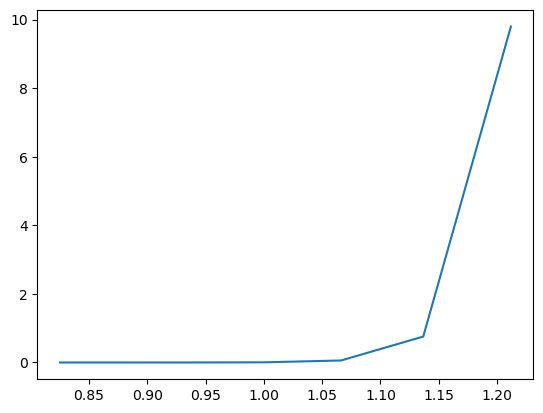

In [35]:
plt.plot(zgrid, k_star)

In [ ]:
# Set parameters.

r = 0.04           # market interest rate
β_fl = 1 / (1 + r) # discount rate in the frictionless economy
β_f = 0.956        # discout rate in the economy with frictions
ν = 0.975          # returns to scale parameter
δ = 0.07           # depriciation rate
σ_e = 0.28         # std. dev. of the shock ε
z1 = 0.428         # productivity parameter
Γ_10 = 0.045       # probability of exogenous exit
ξ = 1.0            # default cost
λ = 0.3            # equity issuance cost
w = 1.0            # wage
α = 1.0            # capital-labor ratio (l/k)

φ = δ + w * α

# Set grids.

emin = 0.0
emax = 100.0
enum = 100
egrid = np.linspace(emin, emax, enum)

zmin = 0.0
zmax = 10.0
znum = 7

mc = qe.tauchen(znum, )
